## Análisis de Datos de Temperatura

- Fecha: 2024-08-06
- Coder: Josefu
- Objetivo: realizar la isnpección sobre los datos recolectados a través del API de openweather y usando la configuración de Linux para el registro de los mismos

In [1]:
import os
import pandas as pd
os.listdir(os.getcwd())

['CityTemperatureAnalysis.ipynb\uf03aZone.Identifier',
 'clima-tokyo-hoy.csv',
 'main.py\uf03aZone.Identifier',
 'proyecto-final.org\uf03aZone.Identifier',
 'clima-tokyo-hoy.csv\uf03aZone.Identifier',
 'get-weather.sh\uf03aZone.Identifier',
 'get-weather.sh',
 'main.py',
 'README.md',
 'README.md\uf03aZone.Identifier',
 'proyecto-final.org',
 'clima-tokyo-hoy-etl.csv',
 'CityTemperatureAnalysis.ipynb',
 'clima-tokyo-hoy-etl.csv\uf03aZone.Identifier',
 'weather-site']

### Lectura de Datos
Lectura del archivo csv con *with open* debido a que openweather coloca valores sobre la lluvia y la nieve cuando éstos están disponibles por lo que en este caso he obtenido 30 campos de lectura obviando los referidos. Esto puede solventarse incluyendo los campos con valor NaN por defecto en el programa de Python para captura de información

In [2]:
import os
import pandas as pd
os.listdir(os.getcwd())
import csv
csv_file = 'clima-tokyo-hoy.csv'
filtered_rows = []
with open(csv_file, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        if len(row) <= 30:
            filtered_rows.append(row)
len(filtered_rows)

43

In [3]:
header = filtered_rows[0]
data = filtered_rows[1:]
print(len(header), len(data))

8 42


In [4]:
# df = pd.read_csv('clima-tokyo-hoy.csv')
df = pd.DataFrame(data, columns=header)
df.shape

(42, 8)

In [8]:
df.sample(10)

,fecha_hora,temperatura,humedad,presion,clima,estado_clima,ciudad,pais
16,2024-08-13 18:56:03,31.67,68.0,1008,Clouds,broken clouds,Tokyo,JP
31,2024-08-13 20:56:02,33.91,64.0,1007,Clouds,broken clouds,Tokyo,JP
41,2024-08-13 22:08:02,34.20,56.0,1007,Rain,light rain,Tokyo,JP
5,2024-08-13 17:36:28,31.51,72.0,1008,Clouds,few clouds,Tokyo,JP
40,2024-08-13 22:00:02,34.26,57.0,1007,Rain,light rain,Tokyo,JP
36,2024-08-13 21:32:02,33.94,62.0,1007,Rain,light rain,Tokyo,JP
33,2024-08-13 21:08:02,34.14,61.0,1007,Clouds,few clouds,Tokyo,JP
20,2024-08-13 19:24:01,32.12,69.0,1008,Clouds,scattered clouds,Tokyo,JP
18,2024-08-13 19:08:02,31.67,68.0,1008,Clouds,broken clouds,Tokyo,JP
37,2024-08-13 21:40:02,33.68,62.0,1007,Rain,light rain,Tokyo,JP


### Análisis de Datos
- Se procede a realizar un plot de variables de interés según el tiempo capturado. La primera columna contiene la información del API sobre tiempo en formato **Timestamp**, misma que se puede convertir a **datetime**.
- Debido al proceso utilizado para guardar los datos `dt` tiene como tipo de dato objeto por lo que es necesario convertirlo a entero. De igual manera existen otras variables capturadas que en este caso por la lectura con `with open` se detectan como object en vez de sus tipos de datos correctos


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fecha_hora    42 non-null     object
 1   temperatura   42 non-null     object
 2   humedad       42 non-null     object
 3   presion       42 non-null     object
 4   clima         42 non-null     object
 5   estado_clima  42 non-null     object
 6   ciudad        42 non-null     object
 7   pais          42 non-null     object
dtypes: object(8)
memory usage: 2.8+ KB


In [7]:
df.presion = df.presion.astype(int)
df.temperatura = df.temperatura.astype(float)
df.humedad = df.humedad.astype(float)
for column in df.columns:
    try:
        df[column] = pd.to_numeric(df[column])
    except ValueError:
        next

In [37]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha_hora    42 non-null     object 
 1   temperatura   42 non-null     float64
 2   humedad       42 non-null     float64
 3   presion       42 non-null     int64  
 4   clima         42 non-null     object 
 5   estado_clima  42 non-null     object 
 6   ciudad        42 non-null     object 
 7   pais          42 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.8+ KB


In [2]:
from datetime import datetime
df_etl = df.copy()
df_etl.sample()

NameError: name 'df' is not defined

Generalmente es de interés realizar un breve análisis estadístico de las variables del dataset

In [39]:
df_etl.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temperatura,42.0,32.600238,1.296140,29.96,31.6175,32.135,33.91,34.5
humedad,42.0,67.285714,5.726642,56.00,62.5000,68.000,72.00,78.0
presion,42.0,1007.690476,0.467901,1007.00,1007.0000,1008.000,1008.00,1008.0


In [40]:
df_etl.to_csv('clima-tokyo-hoy-etl.csv', index=False)

### Presentación de Resultados

Se procede a realizar gráficas de interés para estudiar el comportamiento climatológico

Text(0.5, 1.0, 'Main Temp vs Time in Tokyo')

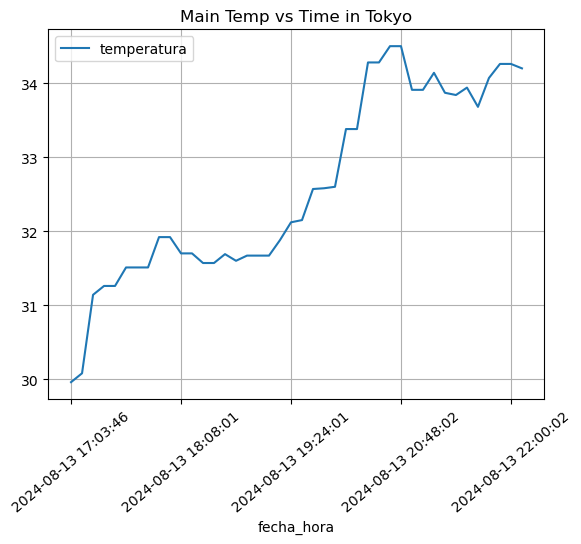

In [41]:
import matplotlib.pyplot as plt

df_etl.plot.line('fecha_hora', 'temperatura')
plt.grid()
plt.xticks(rotation=40) # rotación de las etiquetas 40°
plt.title(f'Main Temp vs Time in {next(iter(set(df_etl.ciudad)))}')


In [42]:
#import plotly_express as px
#fig = px.line(df_etl, x='dt', y=['temperatura', 'humedad'], title=f"Main Tem & Humidity vs Time in {next(iter(set(df_etl.ciudad)))}")
#fig.show()

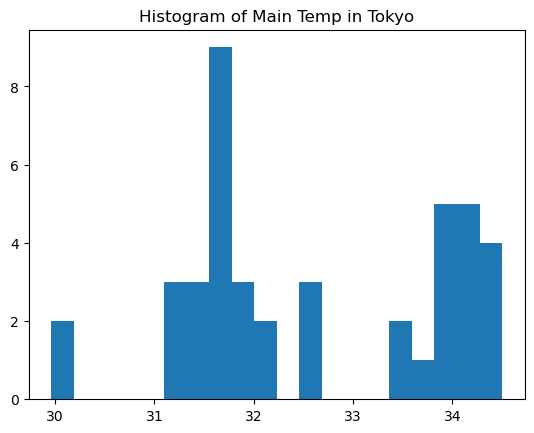

In [43]:
df_etl.temperatura.hist(bins=20)
plt.title(f'Histogram of Main Temp in {next(iter(set(df_etl.ciudad)))}')
plt.grid()

In [44]:
#fig = px.violin(df_etl, 'temperatura', title=f"Violin Plot Main Temp in {next(iter(set(df_etl.ciudad)))}")
#fig.show()

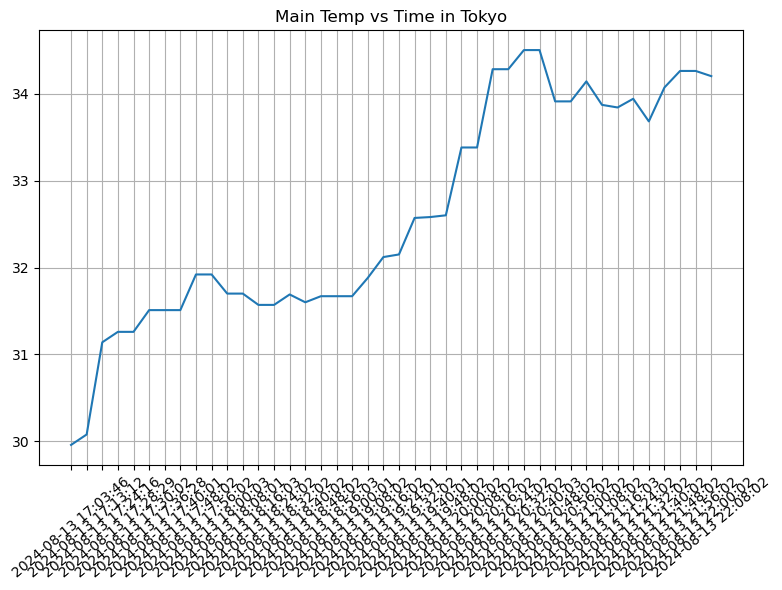

In [45]:
fig = plt.figure(figsize=(8,6))
plt.plot(df_etl['fecha_hora'], df_etl['temperatura'])
plt.grid()
plt.title(f'Main Temp vs Time in {next(iter(set(df_etl.ciudad)))}')
plt.xticks(rotation=40) # rotación de las etiquetas 40°
fig.tight_layout()
fname = '/home/josefu/TokyoWeatherReport/weather-site/content/images/temperature.pdf'
plt.savefig(fname)


In [46]:
#+begin_src python :results graphics file output :file boxplot.svg
#import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(figsize=(5, 5))
#tips = sns.load_dataset("tips")
#sns.boxplot(x="day", y="tip", data=tips)
#+end_src